<a href="https://colab.research.google.com/github/safi50/Census-Income-Classification/blob/main/Census_Income_Data_DecisionTrees%26RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

## Loading Data

In [ ]:
X = pd.read_csv("Census_income_train.csv")
X.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Preprocessing

In [ ]:
print(len(X))

X.isnull().sum()



32560


Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

### Cleaning empty values
Since empty values are replaced with ? in the dataset, we deal with it

In [ ]:

print(f"len of data before cleaning: {len(X)}" )
# Removes all values containing "?"
X_clean = X[X["Workclass"].str.contains("\?") == False]

# Repeating above other columns
X_clean = X_clean[X_clean["Occupation"].str.contains("\?") == False]
X_clean = X_clean[X_clean["Native-country"].str.contains("\?") == False]

print(f"len of data after cleaning: {len(X_clean)}")


len of data before cleaning: 32560
len of data after cleaning: 30161


In [ ]:
# Resetting Indices
X_clean = X_clean.reset_index(drop=True)

### Converting textual data in inputs to numerical due to Sklearn limitations
- We create dummy variables for every categorical data using pandas

In [ ]:
train_dummies = pd.get_dummies(X_clean, drop_first = False)

In [ ]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Removing Redundant Income Column
train_dummies = train_dummies.drop(["Income_ <=50K"], axis = 1)

In [ ]:
# Input vs Target Vars
X_train = train_dummies.iloc[:,:-1]
y_train = train_dummies.iloc[:,-1]

In [ ]:
## Test Dataset

test_data = pd.read_csv("Census_income_test.csv")
test_data.head()
len(test_data)
test_data.isnull().sum()

# Cleaning "?" Values
print(f"len of data before cleaning: {len(test_data)}" )

test_data_clean = test_data[test_data["Workclass"].str.contains("\?") == False ]
test_data_clean = test_data_clean[test_data_clean["Occupation"].str.contains("\?") == False ]
test_data_clean = test_data_clean[test_data_clean["Native-country"].str.contains("\?") == False ]

print(f"len of data after cleaning: {len(test_data_clean)}" )


len of data before cleaning: 16281
len of data after cleaning: 15060


In [ ]:
test_data_clean = test_data_clean.reset_index(drop = True)

test_dummies = pd.get_dummies(test_data_clean, drop_first = False)
test_dummies.head()



,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#dropping redundant column
test_dummies = test_dummies.drop(["Income_ <=50K."], axis = 1)

In [ ]:
X_test = test_dummies.iloc[:,:-1]
y_test = test_dummies.iloc[:,-1]

# Creating and Visualizing a Tree

In [ ]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)


DecisionTreeClassifier()

## Shows a cluttered and overfitted Tree - So we use Pruning(ccp_alpha) to clean it up

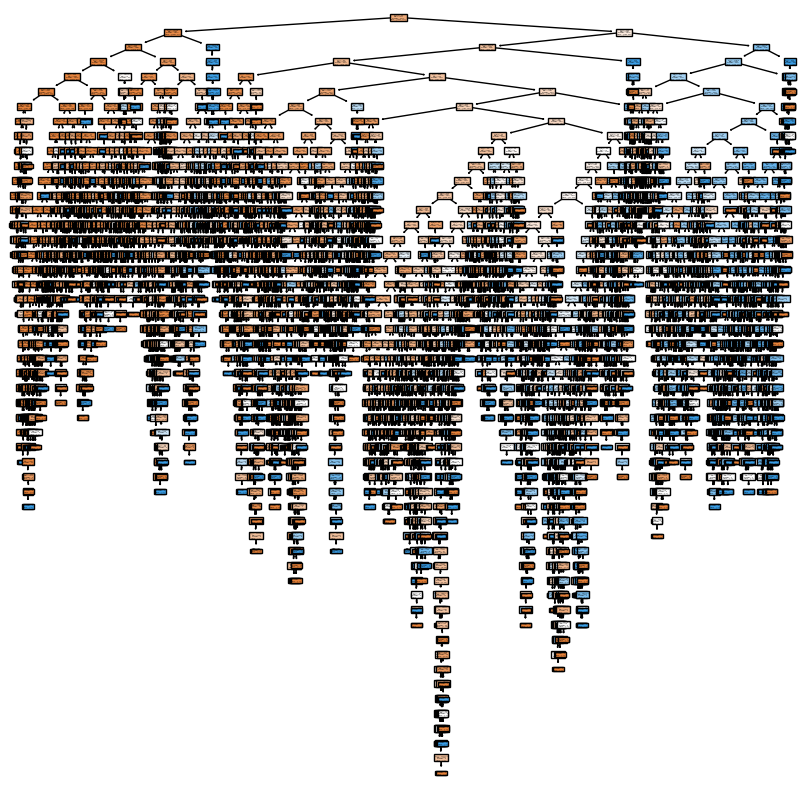

In [ ]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True)

plt.show()

In [ ]:
test_pred = clf.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.80     15060



## New Tree with Pruning

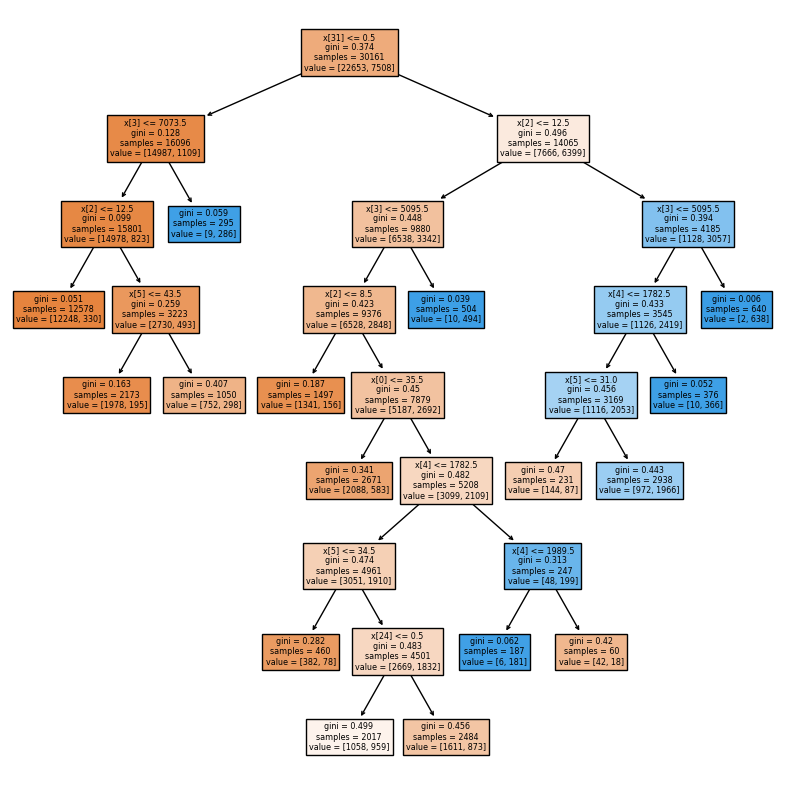

In [ ]:
clf2 = tree.DecisionTreeClassifier(ccp_alpha = 0.001)

clf2.fit(X_train, y_train)

plt.figure(figsize = (10,10))
tree.plot_tree(clf2, filled = True)

plt.show()

In [ ]:
test_pred2 = clf.predict(X_test)
print(classification_report(y_test, test_pred2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.80     15060



# Repeating Steps but Now Using Random Forest Classifier Instead of a Decison Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



### Results: We Improved our accuracy using Random Forests and RFC are also more resistat to overfitting so there's no need for pruning for this dataset